In [3]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('dataset.csv')

fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='Number of Refugees (15/01/2024)',
                    hover_name='Country',
                    projection='natural earth')

fig.update_geos(center=dict(lon=30, lat=49), projection_scale=1)

fig.update_layout(geo=dict(showcountries=True))

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<ipython-input-119-ae505c294a34>:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

<ipython-input-119-ae505c294a34>:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




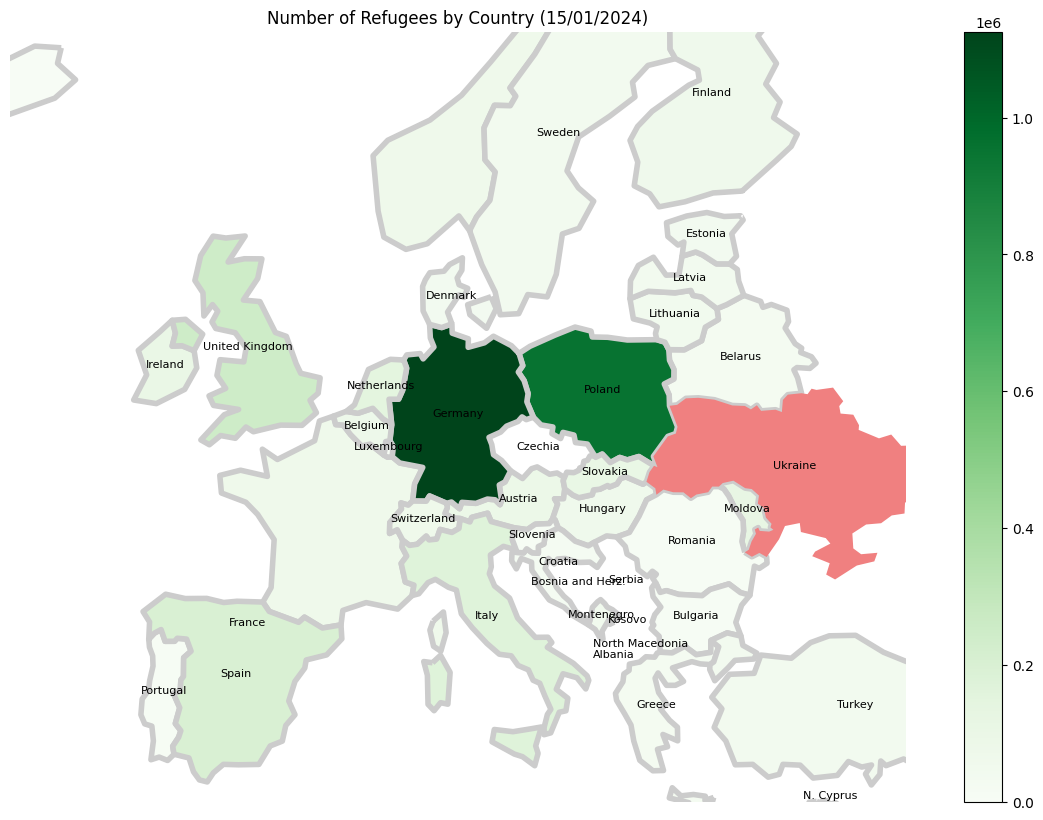

In [119]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(data, how='left', left_on='name', right_on='Country')

country_to_center_on = 'Germany'

centroid = world[world['name'] == country_to_center_on].geometry.centroid.values[0]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Number of Refugees (15/01/2024)', cmap='Greens', linewidth=4, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Refugees by Country (15/01/2024)')

ax.set_xlim(centroid.x - 28, centroid.x + 28)
ax.set_ylim(centroid.y - 16, centroid.y + 16)

world[world['name'] == 'Ukraine'].plot(color='lightcoral', ax=ax)


for idx, row in world.iterrows():
    plt.annotate(text=row['name'], xy=row.geometry.centroid.coords[0], horizontalalignment='center', fontsize=8)

ax.axis('off')

plt.show()


In [118]:
import pandas as pd
import geopandas as gpd
import folium

m = folium.Map(location=[centroid.y, centroid.x], zoom_start=4, tiles='cartodbpositron')


folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=world,
    columns=['iso_a3', 'Number of Refugees (15/01/2024)'],
    key_on='feature.properties.iso_a3',
    fill_color='Reds',
    fill_opacity=0.3,
    line_opacity=1,
    legend_name='Number of Refugees (15/01/2024)',
    highlight=False,
    line_color='black',
    line_weight=0,
    nan_fill_color='grey',
    nan_fill_opacity=0.2
).add_to(m)


def style_function(feature):
    if feature['properties']['name'] == 'Ukraine':
        return {
            'fillColor': 'green',
            'fillOpacity': 0.3,
            'weight': 2,
            'color': 'black'
        }
    else:
        return {
            'fillOpacity': 0,
            'color': 'black'
        }

folium.GeoJson(
    world,
    style_function=style_function
).add_to(m)

display(m)
